# Atividade Prática

Nessa atividade iremos dar os primeiros passos 
para a tarefa de clustering (aprendizado não-supervisionado)
é esperado que ao término dessa prática se tenha as seguintes habilidades:

* Análise exploratória a partir de uma gráfico de dispersão;
* Execução do algoritmo k-means através da lib sklearn;
* Análise dos clusters gerados
* Descoberta do número de grupos

## passo 1: import das libs necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans # [ALTERE AQUI] realize o import do KMeans

## passo 2: carregar o dataset

Obs: iremos considerar X sendo nosso dataset e y_true o que seriam as classes dos dados

In [ ]:
X, y_true = make_blobs(
    n_samples=600, n_features=2, centers=7, cluster_std=0.1, random_state=0
)

# os dados foram carregados em um formato matricial numpy, 
# porém para facilitar as análises precisaremos converter para um
# tipo pandas DataFrame
X = pd.DataFrame(X)

## passo 3: análise exploratória do dataset

dimensões do dataset (exemplos, features):  (600, 2)

as estatísticas básicas dos dados: 
                0           1
count  600.000000  600.000000
mean     2.383434    3.236446
std      3.616633    3.659243
min     -1.763863   -2.555702
25%     -1.215534    0.660064
50%      1.382243    2.921093
75%      5.782980    7.741719
max      9.522975    8.688925

dispersão dos dados:


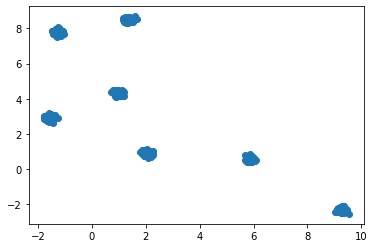

In [ ]:
print("dimensões do dataset (exemplos, features): ", X.shape)
print("\nas estatísticas básicas dos dados: ")
print(X.describe())


print("\ndispersão dos dados:")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.show()

## passo 4: detecção automática do número de *grupos*

In [ ]:
def get_clustering_metric(X, k):
  model = KMeans(n_clusters=k).fit(X)
  # [ALTERE AQUI] execute o k-means e retorne o valor da inertia
  return model.inertia_

1: 15855.588382430455
2: 5266.7209040689995
3: 2282.555606434871
4: 1311.076519689896
5: 686.1280658160879
6: 332.92177318587613
7: 11.264380704372812
8: 10.502570024069504
9: 9.875160527826147
10: 9.213961118162032
best k:  7


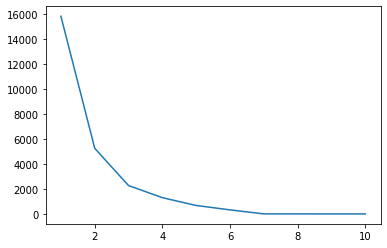

In [ ]:
# declare uma lista de possíveis valores para o k
n_clusters_candidates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

values = []

# itere sobre a lista e armazene as diferenças
for k in n_clusters_candidates:
	
	# execute o k-means e em seguida obtenha o valor para a inertia ou silhueta
  current_metric_value = get_clustering_metric(X, k)
  print(f'{k}: {current_metric_value}')

  values.append(current_metric_value)

min_value = np.inf
best_k = -1

for i in range(1, len(values)-1):
  val1 = values[i-1] - values[i]
  val2 = values[i] - values[i+1]
  val = val2 / val1

  if val < min_value:
      min_value = val
      best_k = n_clusters_candidates[i]

print("best k: ", best_k)

plt.plot (n_clusters_candidates, values, )
plt.show() # [ALTERE AQUI] plote a variável values

## passo 5: execução do k-means utilizando o melhor valor para o K

In [ ]:
# [ALTERE AQUI] realize o treinamento do k-means e armazene na variável model
model = model = KMeans(n_clusters=best_k).fit(X)

y_predict = model.labels_

[0 5 0 5 2 2 6 3 3 6 3 2 1 2 0 3 1 0 1 3 2 0 6 6 1 5 6 5 5 1 1 1 1 2 2 2 0
 4 6 1 1 5 3 5 5 5 5 5 0 1 4 1 1 0 1 1 6 3 2 2 6 2 2 3 5 4 0 3 3 1 3 4 3 5
 5 6 4 4 6 6 3 4 4 1 5 0 1 6 3 4 1 2 5 2 3 3 3 6 5 0 3 1 2 0 6 2 2 2 6 0 5
 6 5 3 2 6 2 0 0 4 3 5 0 2 2 3 4 3 4 5 3 3 0 1 6 5 3 5 6 1 3 3 4 6 6 1 5 1
 6 5 3 1 2 4 4 6 2 4 6 0 1 3 1 1 6 2 2 4 0 1 1 2 0 2 4 0 1 6 5 1 0 2 0 4 1
 3 4 5 1 3 0 1 0 2 3 4 6 3 6 4 0 1 3 5 0 4 5 5 1 3 6 2 1 6 0 4 5 2 2 6 0 5
 4 5 5 6 0 2 4 2 6 4 0 6 1 3 2 1 6 0 2 2 2 0 3 5 2 5 6 6 2 4 4 5 4 6 6 1 6
 5 0 2 0 6 6 6 2 4 1 0 5 6 2 0 0 6 1 3 6 4 0 4 0 4 4 5 1 5 1 3 6 0 6 0 1 4
 0 4 4 3 3 2 6 5 1 3 5 5 3 3 3 6 2 1 0 0 6 0 6 2 1 5 4 6 3 4 4 1 1 4 6 3 2
 4 4 6 5 0 0 3 4 2 2 6 1 2 1 4 4 1 2 5 1 2 5 4 3 1 0 0 4 5 2 6 2 3 3 3 1 4
 4 6 3 1 3 3 5 4 0 0 4 0 3 0 5 1 5 4 1 6 4 2 3 1 0 0 6 0 4 2 2 4 4 4 1 4 2
 4 3 1 6 3 5 1 6 3 5 5 5 6 4 5 4 4 4 0 6 4 2 0 6 5 6 1 5 4 0 4 3 2 1 5 1 3
 0 3 6 2 4 2 3 3 6 0 2 3 3 1 5 2 4 5 3 3 6 3 0 0 1 0 5 1 5 3 4 6 5 6 5 6 6
 0 1 1 6 5 5 3 4 5 6 3 2 

## passo 6: avaliação do k-means

Silhueta:  0.9456683330740325
NMI:  1.0


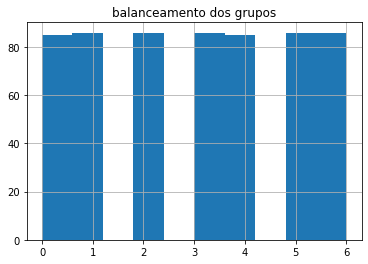

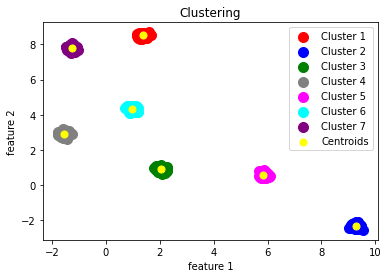

In [ ]:
from sklearn import metrics

sil = metrics.silhouette_score(X, y_predict, metric='euclidean')# [ALTERE AQUI] calcule a silhueta
nmi = metrics.normalized_mutual_info_score(y_true,y_predict) # [ALTERE AQUI] calcule o NMI

print("Silhueta: ", sil)
print("NMI: ", nmi)

# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()


# plot de como ficou a clusterização
plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X.iloc[y_predict==3, 0], X.iloc[y_predict==3, 1], s=100, c='gray', label ='Cluster 4')
plt.scatter(X.iloc[y_predict==4, 0], X.iloc[y_predict==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X.iloc[y_predict==5, 0], X.iloc[y_predict==5, 1], s=100, c='cyan', label ='Cluster 6')
plt.scatter(X.iloc[y_predict==6, 0], X.iloc[y_predict==6, 1], s=100, c='purple', label ='Cluster 7')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()